In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import OrderedDict

from DeepConvNet import DeepConvNet
from run_model import run, draw_figure

In [2]:
from dataloader import read_bci_data
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# Load data
train_data, train_label, test_data, test_label = read_bci_data()

# Convert data type into float32
train_data  = torch.from_numpy(train_data).type(torch.float32).to(device)
train_label = torch.from_numpy(train_label).type(torch.long).to(device)
test_data   = torch.from_numpy(test_data).type(torch.float32).to(device)
test_label  = torch.from_numpy(test_label).type(torch.long).to(device)

(1080, 1, 2, 750) (1080,) (1080, 1, 2, 750) (1080,)


# Run Model

In [4]:
net_list = {}
line_list = []
label_list = ['elu_train','elu_test','leaky_relu_train','leaky_relu_test','relu_train','relu_test']
#label_list = ['leaky_relu_train','leaky_relu_test']

In [5]:
# ELU
net = DeepConvNet().to(device)
optimizer = optim.SGD(net.parameters(),lr=1e-2, weight_decay=5e-2,momentum=0.9)
lr_sch = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
#optimizer = optim.Adagrad(net.parameters(),lr=1e-4,lr_decay=0.8,weight_decay=5e-3)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label,\
                                               optimizer = optimizer, scheduler=lr_sch, num_epochs = 300, batch_size = 64,\
                                               print_freq = 500)
torch.save(net,'./model_weight/DeepConvNet_ELU')
net_list['ELU'] = net
line_list.append(acc_train_list)
line_list.append(acc_test_list)

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:293: UserWarning: Couldn't retrieve source code for container of type DeepConvNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/conda/lib/python3.6/site-packages/torch/serialization.py:293: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/conda/lib/python3.6/site-packages/torch/serialization.py:293: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/conda/lib/python3.6/site-packages/torch/serialization.py:293: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/conda/lib/pyt

In [6]:
# Leaky_relu
net = DeepConvNet(act_f='leakyrelu').to(device)
optimizer = optim.SGD(net.parameters(),lr=1e-2, weight_decay=5e-2,momentum=0.9)
lr_sch = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
#optimizer = optim.Adagrad(net.parameters(),lr=1e-4,lr_decay=0.8,weight_decay=5e-3)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label,\
                                               optimizer = optimizer, scheduler=lr_sch, num_epochs = 300, batch_size = 64,\
                                               print_freq = 500)
torch.save(net,'./model_weight/DeepConvNet_Leaky_ReLU')
net_list['Leaky_ReLU'] = net
line_list.append(acc_train_list)
line_list.append(acc_test_list)

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:293: UserWarning: Couldn't retrieve source code for container of type LeakyReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [7]:
# Relu
net = DeepConvNet(act_f='relu').to(device)
optimizer = optim.SGD(net.parameters(),lr=1e-2, weight_decay=5e-2,momentum=0.9)
lr_sch = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
#optimizer = optim.Adagrad(net.parameters(),lr=1e-4,lr_decay=0.8,weight_decay=5e-3)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label,\
                                               optimizer = optimizer, scheduler=lr_sch, num_epochs = 300, batch_size = 64,\
                                               print_freq = 500)
torch.save(net,'./model_weight/DeepConvNet_ReLU')
net_list['ReLU'] = net
line_list.append(acc_train_list)
line_list.append(acc_test_list)

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:293: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


# Draw loss & accuracy figures

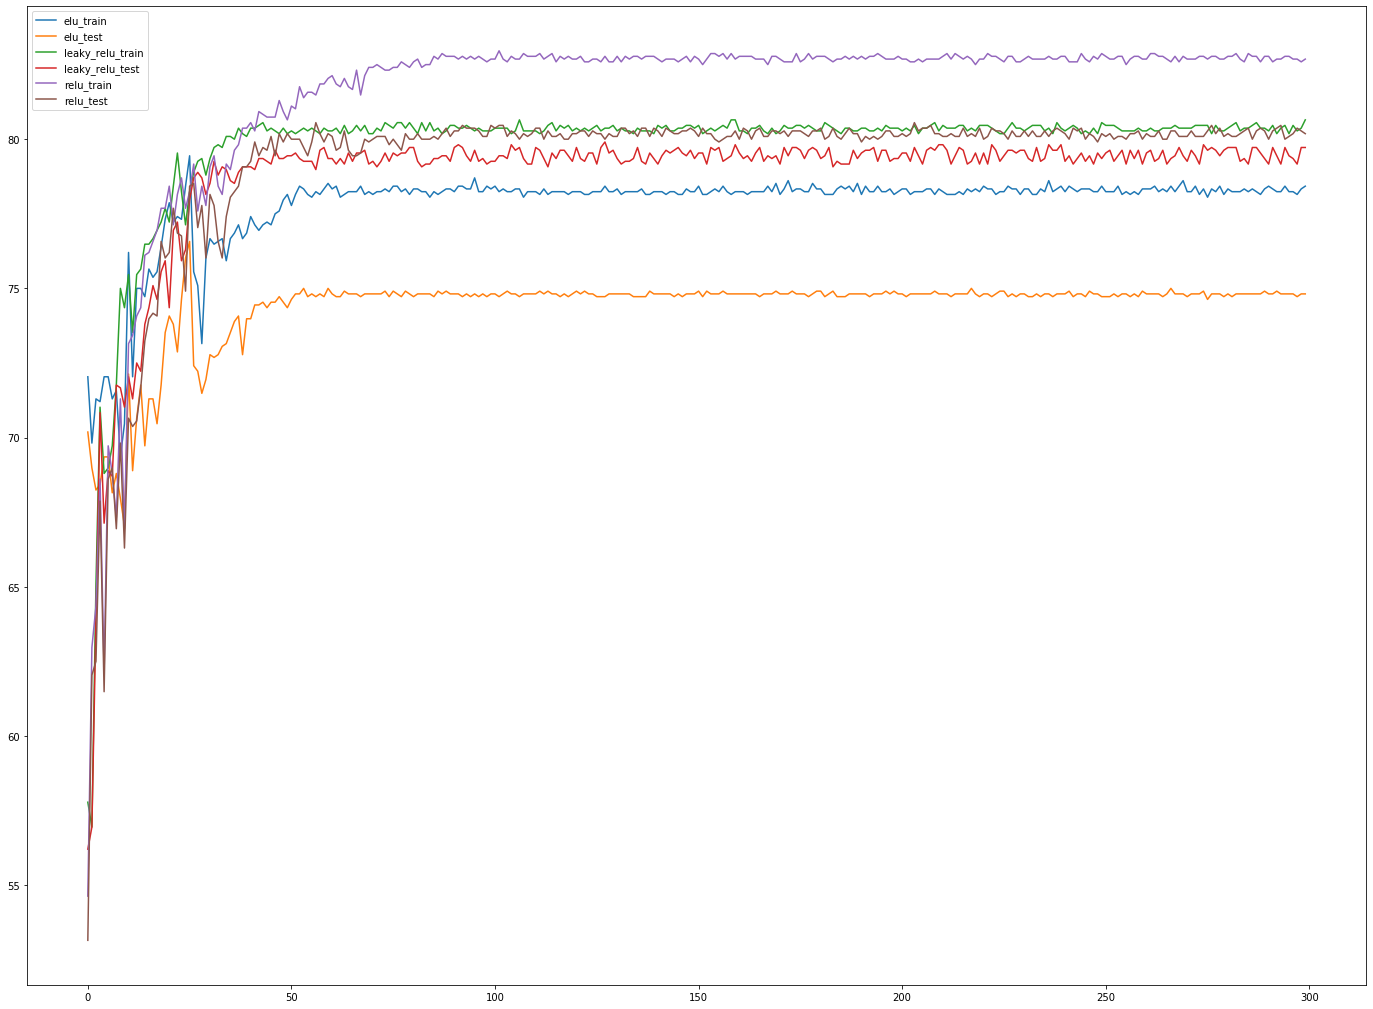

In [8]:
plt.figure(figsize=[24,18])
draw_figure(plt,line_list,label_list, loc='best') 

In [9]:
for i in {1,3,5}:
    print('Test Accuracy = ',line_list[i][-1])

Test Accuracy =  74.81481481481481
Test Accuracy =  79.72222222222223
Test Accuracy =  80.18518518518518


In [10]:
print('Test Accuracy:')
print('-------------------------')
print('With ELU        :',line_list[1][-1],'%')
print('With Leaky ReLU :',line_list[3][-1],'%')
print('With ReLU       :',line_list[5][-1],'%')

Test Accuracy:
-------------------------
With ELU        : 74.81481481481481 %
With Leaky ReLU : 79.72222222222223 %
With ReLU       : 80.18518518518518 %
